# Test Reaction Times

This notebook will help you plot your data from the reaction time lab, as well as test for statistically significant differences between auditory and visual reaction times. You might find it useful to refer back to the Statistics.ipynb notebook as well.

## Setup

As usual, let's first import the packages we need.

In [1]:
# Import our necessary toolboxes and tell matplotlib to plot inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # configure high-resolution plotting

print('Packages Imported.')

Packages Imported.


## Step 1. Import your Data
> In the cell below, change the filename so that it *exactly matches* the file you uploaded to DataHub. Once you run the cell, it should show you data that looks similar to your spreadsheet.

In [11]:
filename = 'data/RTclassdata.csv'

data = pd.read_csv(filename)
print(str(len(data))+' responses')
data.head()

38 responses


,Visual,Auditory,Sleep,Caffeine,InNOut,Elevation
0,256,236,7.0,0.0,Yes,82.000000
1,233,134,5.0,0.0,Yes,810.728437
2,226,200,8.0,1.0,Yes,331.000000
3,256,171,8.0,0.0,Yes,56.994819
4,233,163,8.0,0.0,Yes,1066.000000


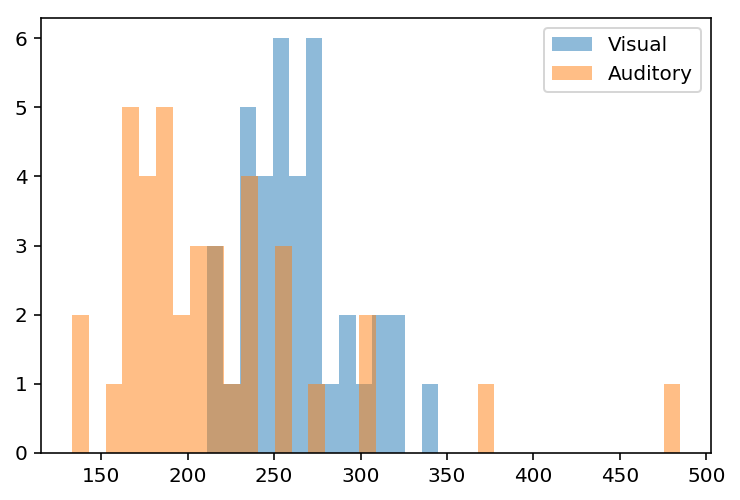

In [3]:
import math

bin_width = 10
auditory_bins = math.ceil((data['Auditory'].max() - data['Auditory'].min())/bin_width)
visual_bins = math.ceil((data['Visual'].max() - data['Visual'].min())/bin_width)

plt.hist(data['Visual'],alpha=.5,bins=visual_bins)
plt.hist(data['Auditory'],alpha=.5,bins=auditory_bins)
plt.legend(['Visual','Auditory'])
plt.show()

In [4]:
print(stats.skewtest(data['Auditory']))
print(stats.skewtest(data['Visual']))

SkewtestResult(statistic=4.430564989623323, pvalue=9.398651596664997e-06)
SkewtestResult(statistic=1.6028000908766782, pvalue=0.10897879677925931)


In [5]:
print(stats.wilcoxon(data['Auditory'],data['Visual']))

WilcoxonResult(statistic=112.0, pvalue=0.00017741141640078772)


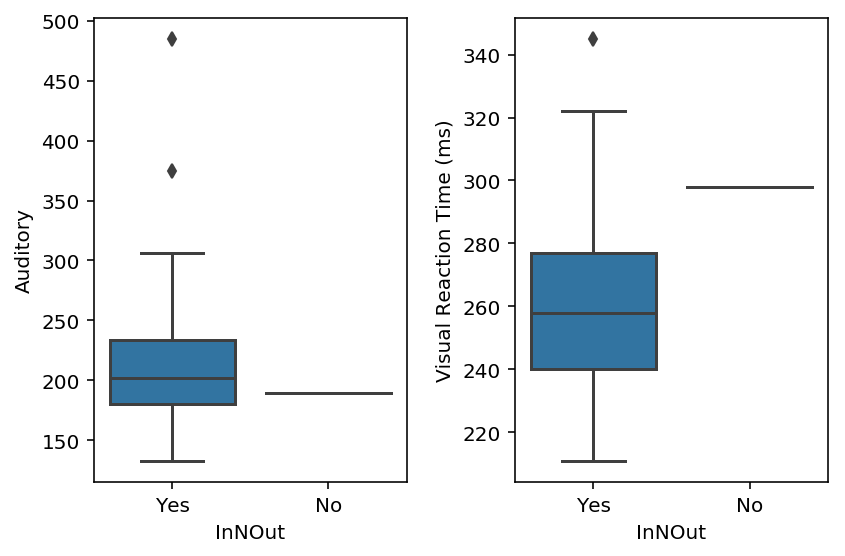

In [6]:
fig,ax = plt.subplots(1,2)

sns.boxplot(y='Auditory',x='InNOut',data=data,ax=ax[0])
plt.ylabel('Auditory Reaction Time (ms)')

sns.boxplot(y='Visual',x='InNOut',data=data,ax=ax[1])
plt.ylabel('Visual Reaction Time (ms)')

fig.tight_layout()
plt.show()

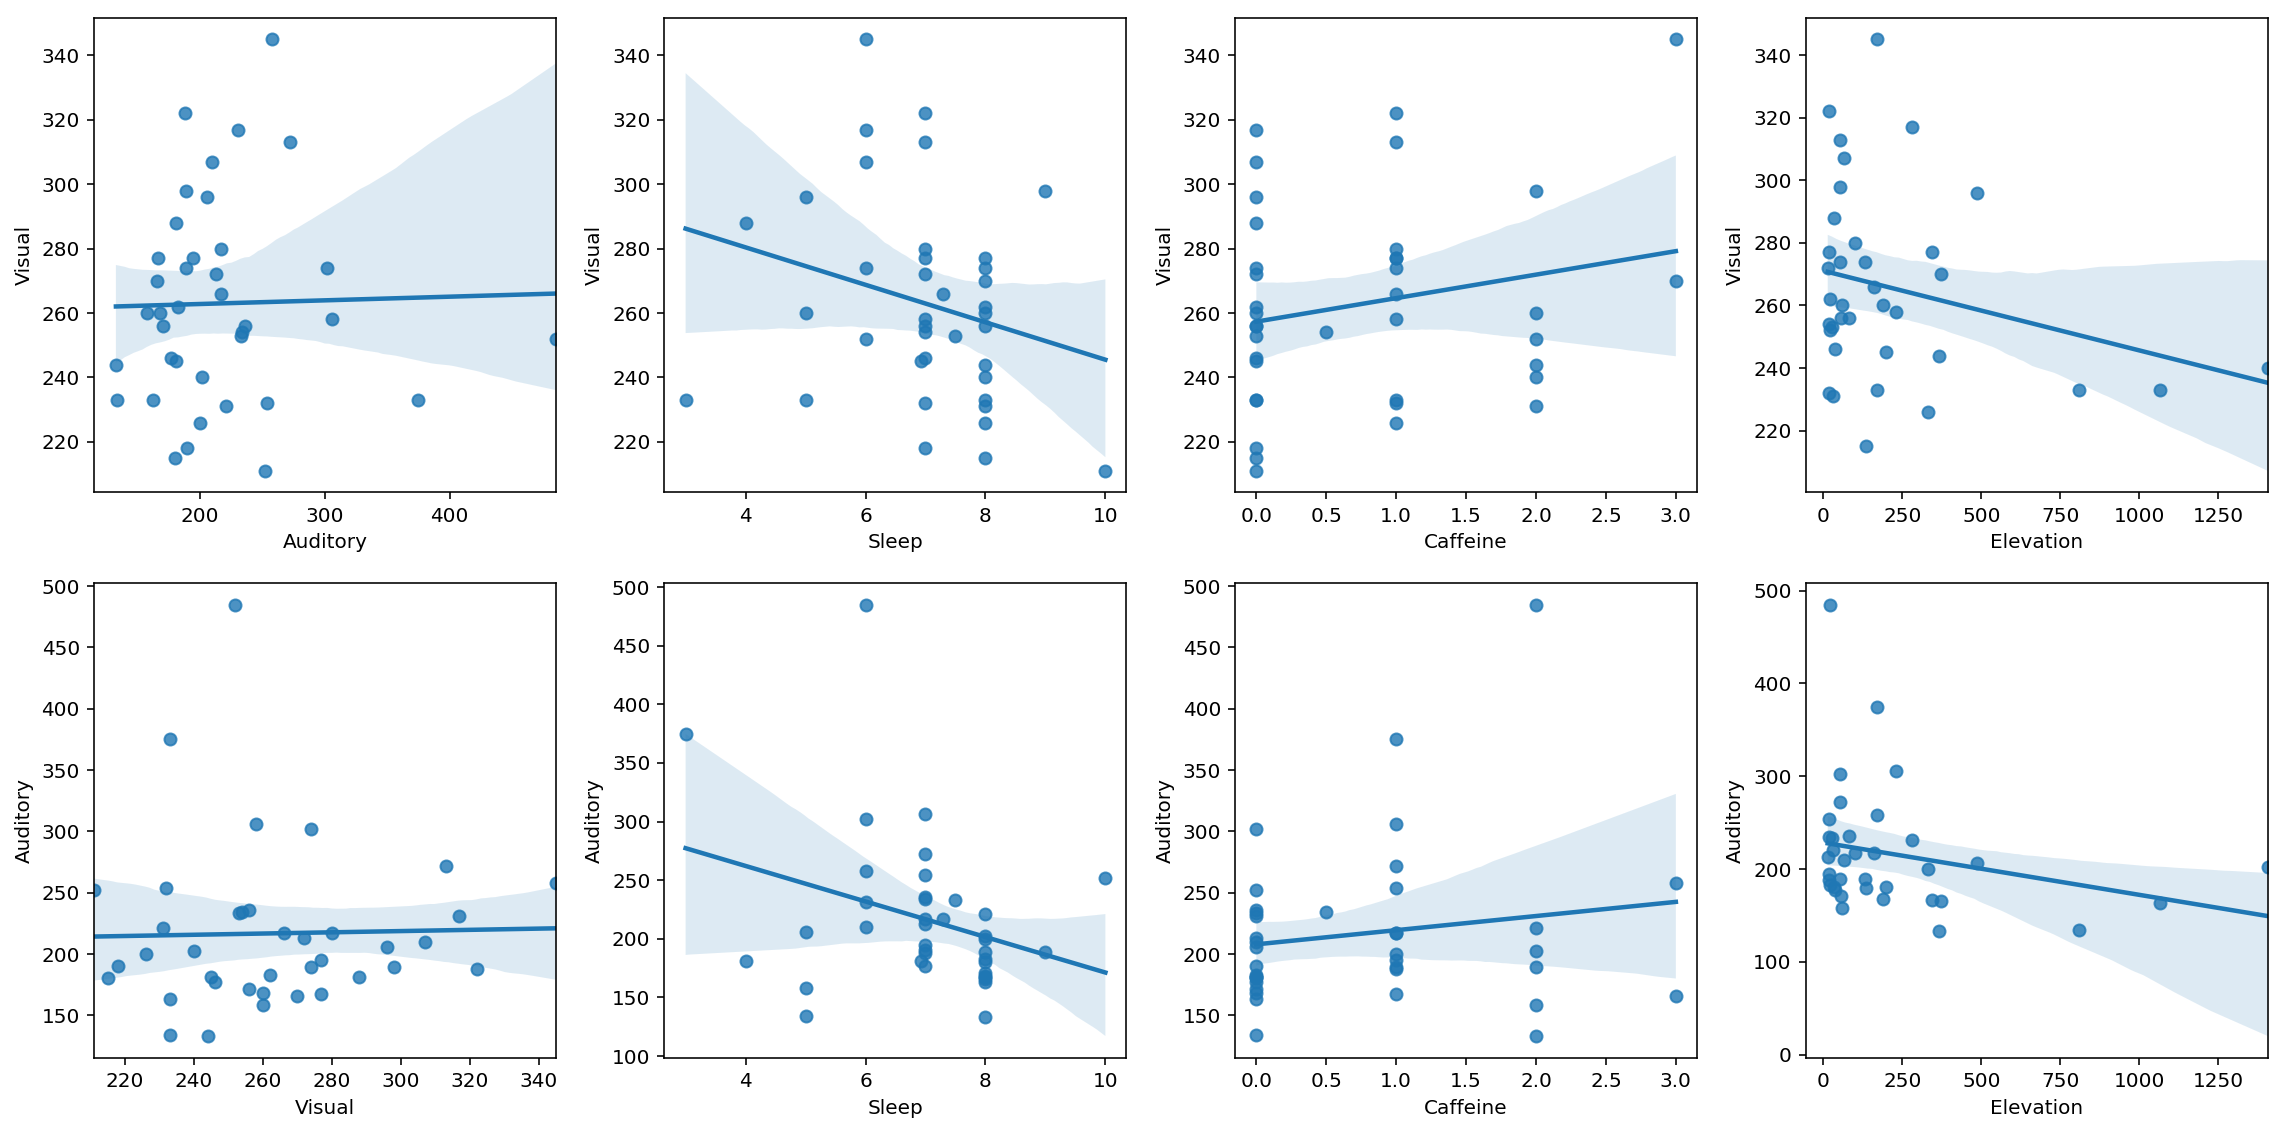

In [12]:
fig,ax = plt.subplots(2,4,figsize=(16,8))

sns.regplot(x='Auditory',y='Visual',data=data,ax=ax[0,0])
sns.regplot(x='Sleep',y='Visual',data=data,ax=ax[0,1])
sns.regplot(x='Caffeine',y='Visual',data=data,ax=ax[0,2])
sns.regplot(x='Elevation',y='Visual',data=data,ax=ax[0,3])

sns.regplot(x='Visual',y='Auditory',data=data,ax=ax[1,0])
sns.regplot(x='Sleep',y='Auditory',data=data,ax=ax[1,1])
sns.regplot(x='Caffeine',y='Auditory',data=data,ax=ax[1,2])
sns.regplot(x='Elevation',y='Auditory',data=data,ax=ax[1,3])

fig.tight_layout()
plt.show()

In [21]:
columns = ['Sleep','Caffeine','Elevation']
data = data.dropna() # drop empty responses
print(str(len(data))+' responses')

# Auditory
for i in columns:
    r, p = stats.pearsonr(data['Auditory'],data[i])

    print('Auditory Reaction Time and '+ i)
    print('p = '+ str(p))
    print('r = '+ str(r))
        
# Visual
for i in columns:
    r, p = stats.pearsonr(data['Visual'],data[i])
  
    print('Visual Reaction Time and '+ i)
    print('p = '+ str(p))
    print('r = '+ str(r))


36 responses
Auditory Reaction Time and Sleep
p = 0.02616494222279534
r = -0.37040360011019113
Auditory Reaction Time and Caffeine
p = 0.33315674858615363
r = 0.1660321939287626
Auditory Reaction Time and Elevation
p = 0.1338125505629322
r = -0.25471966730873263
Visual Reaction Time and Sleep
p = 0.32892573737705866
r = -0.167470697846496
Visual Reaction Time and Caffeine
p = 0.3885168660458397
r = 0.14815140783682823
Visual Reaction Time and Elevation
p = 0.1279358220498465
r = -0.2585038331209365


In [9]:
# Monica's data
filename = 'data/ClassData_SurveyResults.csv'

data = pd.read_csv(filename)
data = data.drop(labels='Unnamed: 0',axis=1)
data = data.rename(columns={'Do you play any video games?':'Video', 'How many hours of sleep did you get? ': 'Sleep', 'Are you left handed or right handed?': 'Handed', 'What is your hair color?':'Hair', 'What is your preferred chocolate flavor?':'Chocolate'})
print(str(len(data))+' responses')
data.head()

42 responses


,Visual,Auditory,Video,Sleep,Handed,Hair,Chocolate
0,204,295,Yes,3,Right handed,Brown,Dark chocolate
1,323,245,Yes,6,Right handed,Black,White chocolate
2,298,166,No,6,Right handed,Black,Dark chocolate
3,232,175,Yes,6,Right handed,Black,Chocolate with fruit flavoring (ex. Raspberry ...
4,316,163,Yes,8,Right handed,blonde,Dark chocolate


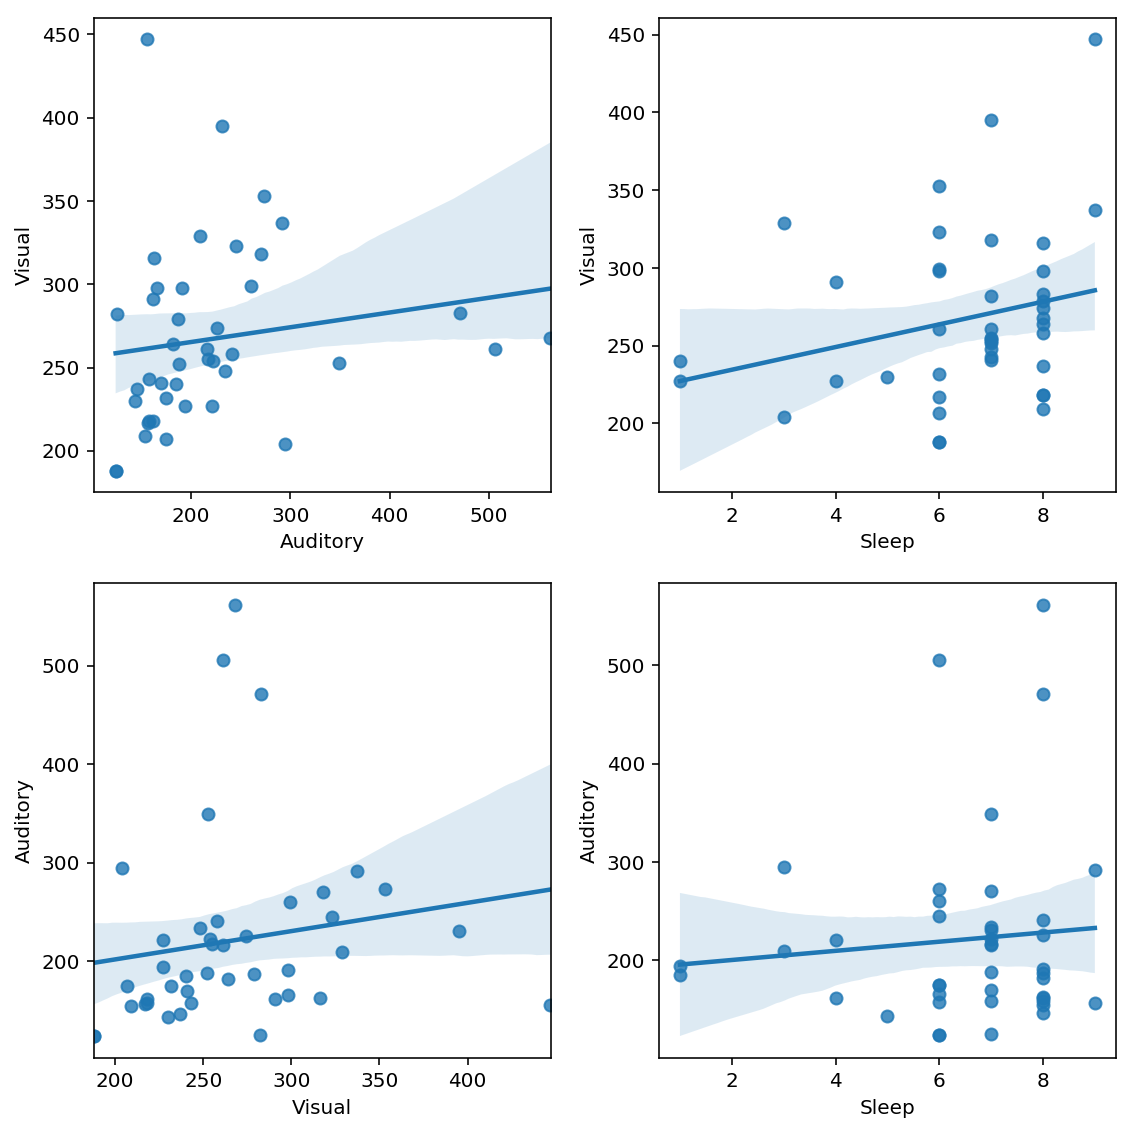

In [98]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

sns.regplot(x='Auditory',y='Visual',data=data,ax=ax[0,0])
sns.regplot(x='Sleep',y='Visual',data=data,ax=ax[0,1])
sns.regplot(x='Visual',y='Auditory',data=data,ax=ax[1,0])
sns.regplot(x='Sleep',y='Auditory',data=data,ax=ax[1,1])

fig.tight_layout()
plt.show()

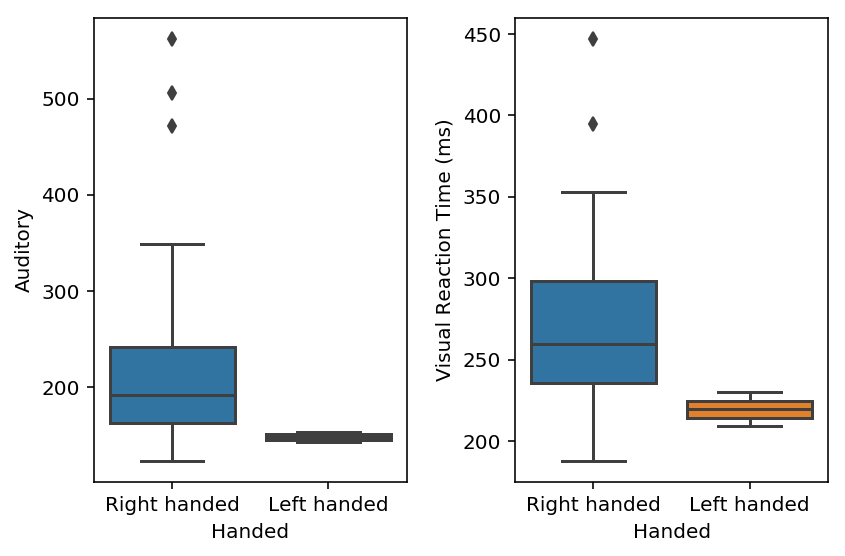

In [99]:
fig,ax = plt.subplots(1,2)

sns.boxplot(y='Auditory',x='Handed',data=data,ax=ax[0])
plt.ylabel('Auditory Reaction Time (ms)')

sns.boxplot(y='Visual',x='Handed',data=data,ax=ax[1])
plt.ylabel('Visual Reaction Time (ms)')

fig.tight_layout()
plt.show()

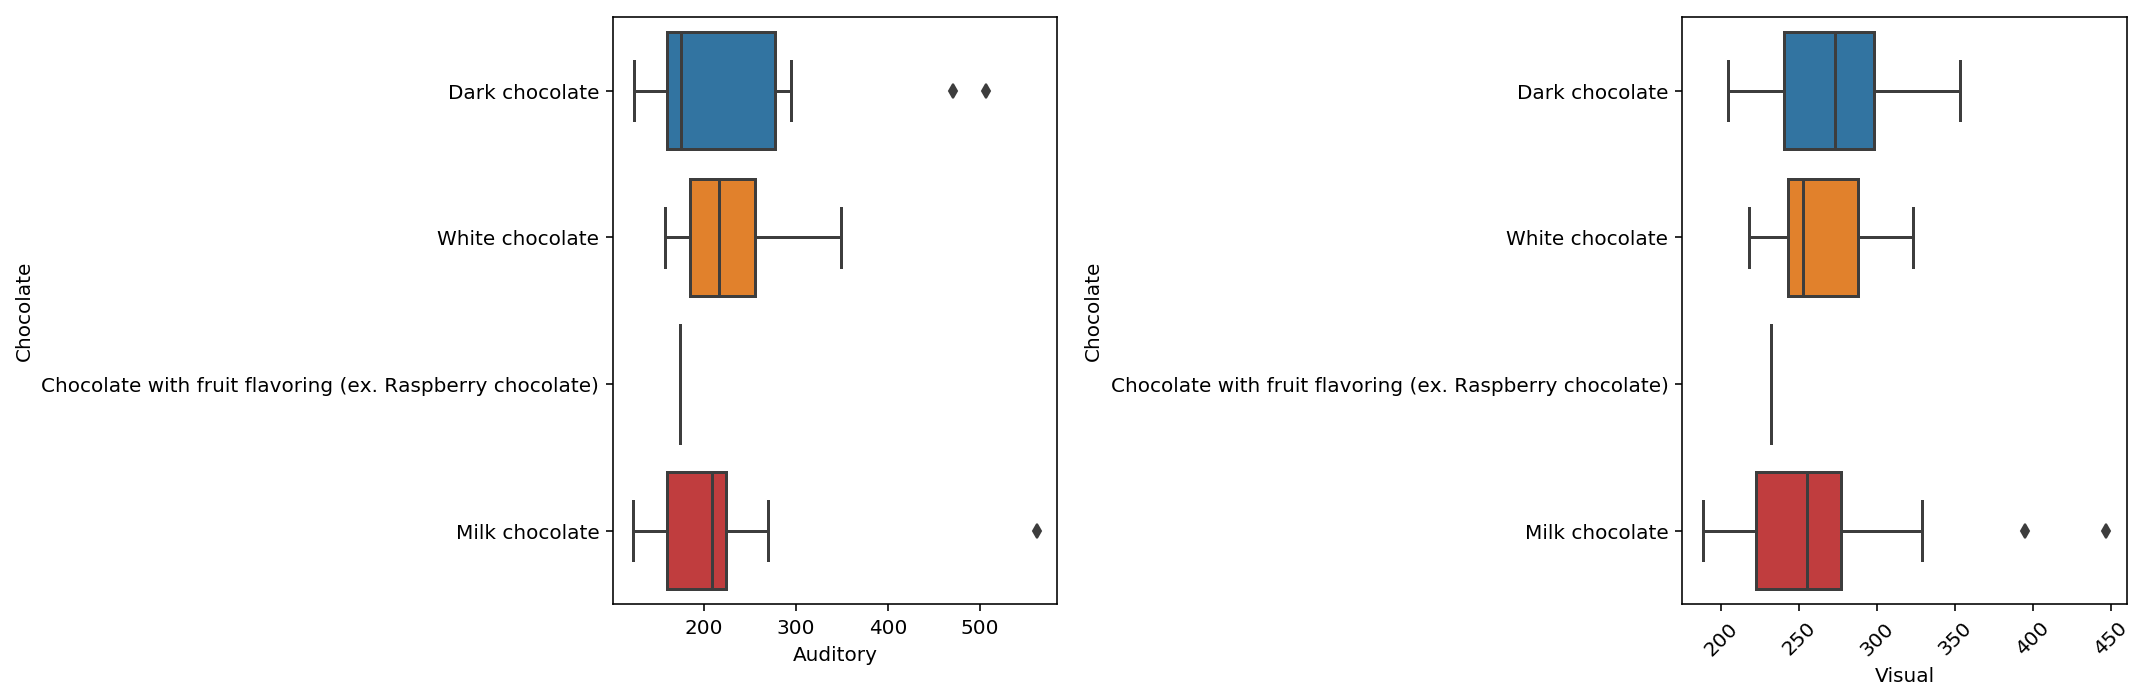

In [113]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(x='Auditory',y='Chocolate',data=data,ax=ax[0])
plt.ylabel('Auditory Reaction Time (ms)')

sns.boxplot(x='Visual',y='Chocolate',data=data,ax=ax[1])
plt.xticks(rotation = 45) 
fig.tight_layout()
plt.show()